#1 使用KNN回归算法拟合随机数曲线

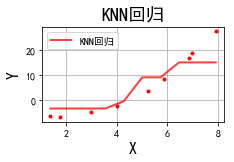

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

def xss(y, y_hat):
    y = y.ravel()
    y_hat = y_hat.ravel()
    # Version 1
    tss = ((y - np.average(y)) ** 2).sum()
    rss = ((y_hat - y) ** 2).sum()
    ess = ((y_hat - np.average(y)) ** 2).sum()
    r2 = 1 - rss / tss
    tss_list.append(tss)
    rss_list.append(rss)
    ess_list.append(ess)
    ess_rss_list.append(rss + ess)
    corr_coef = np.corrcoef(y, y_hat)[0, 1]
    return r2, corr_coef

np.random.seed(0)
np.set_printoptions(linewidth=1000)
N = 9
x = np.linspace(0, 8, N) + np.random.randn(N)
x = np.sort(x)
y = x**2 - 4*x - 3 + np.random.randn(N)
x.shape = -1, 1
y.shape = -1, 1

model = KNeighborsRegressor()
model.fit(x, y)

x_hat = np.linspace(x.min(), x.max(), num=10)
x_hat.shape = -1, 1
y_hat = model.predict(x_hat)

plt.subplot(2, 2, 1)
plt.plot(x, y, 'ro', ms=3, zorder=N)
plt.plot(x_hat, y_hat, color='r', lw=2, label='KNN回归', alpha=0.75)
plt.legend(loc='upper left')
plt.grid(True)
plt.title('KNN回归', fontsize=18)
plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16)

plt.tight_layout(1, rect=(0, 0, 1, 0.95))
plt.show()